In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/notebooks/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/notebooks/data/train.csv
/notebooks/data/sample_submission.csv
/notebooks/data/test.csv
/notebooks/data/spaceship-titanic.zip


In [3]:
train_data_raw = pd.read_csv("/notebooks/data/train.csv")
predict_data = pd.read_csv("notebooks/data/test.csv")
gender_submission = pd.read_csv("/notebooks/data/sample_submission.csv")

In [4]:
# raw
train_data_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.    

`PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.  

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  

`Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either `P` for Port or `S` for Starboard.  

`Destination` - The planet the passenger will be debarking to.  

`Age` - The age of the passenger.  

`VIP` - Whether the passenger has paid for special VIP service during the voyage.  

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  

`Name` - The first and last names of the passenger.  

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.    

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.

`PassengerId` - Id for each passenger in the test set.

`Transported` - The target. For each passenger, predict either True or False.

In [5]:
train_data_raw.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_data_raw.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

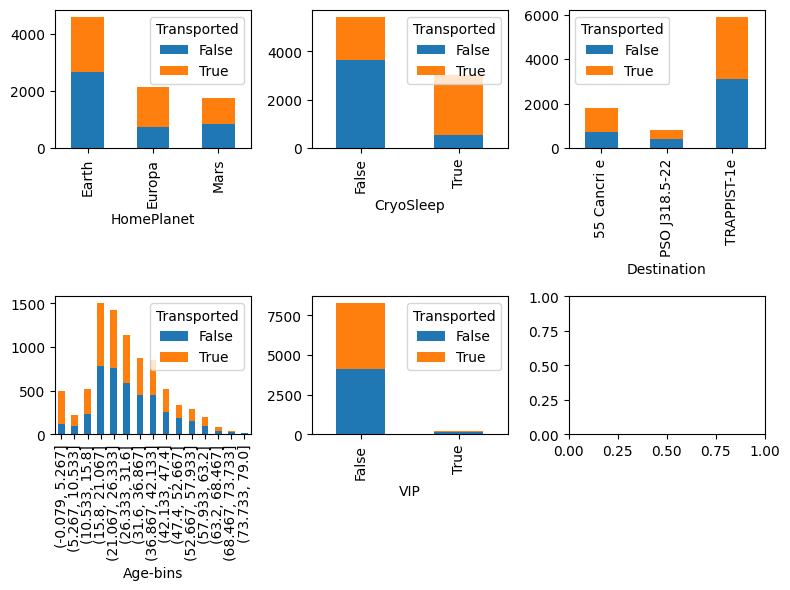

<Figure size 640x480 with 0 Axes>

In [7]:
train_data = train_data_raw.copy()
count = []

homePlanet_count_df = train_data.groupby('HomePlanet')['Transported'].value_counts().unstack()
cryoSleep_count_df = train_data.groupby('CryoSleep')['Transported'].value_counts().unstack()
destination_count_df = train_data.groupby('Destination')['Transported'].value_counts().unstack()
train_data["Age-bins"] = pd.cut(train_data["Age"], bins = 15)
age_count_df = train_data.groupby('Age-bins')['Transported'].value_counts().unstack()
VIP_count_df = train_data.groupby('VIP')['Transported'].value_counts().unstack()

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
plt.figure()
homePlanet_count_df.plot(kind = "bar", stacked=True, ax=axes[0][0])
cryoSleep_count_df.plot(kind = "bar", stacked=True, ax=axes[0][1])
destination_count_df.plot(kind = "bar", stacked=True, ax=axes[0][2])
age_count_df.plot(kind ="bar", stacked=True, ax=axes[1][0])
VIP_count_df.plot(kind ="bar", stacked=True, ax=axes[1][1])
fig.tight_layout()
plt.show()

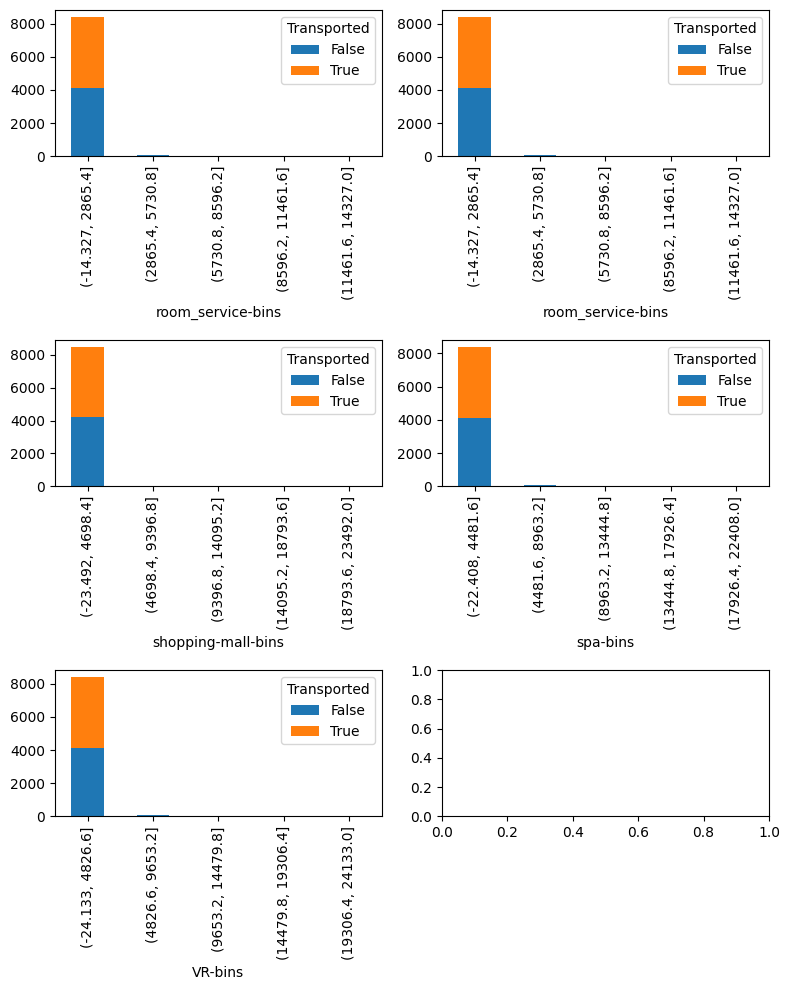

<Figure size 640x480 with 0 Axes>

In [8]:
train_data["room_service-bins"] = pd.cut(train_data["RoomService"], bins = 5)
room_service_count_df = train_data.groupby('room_service-bins')['Transported'].value_counts().unstack()
train_data["food-court-bins"] = pd.cut(train_data["FoodCourt"], bins = 5)
food_court_count_df = train_data.groupby('room_service-bins')['Transported'].value_counts().unstack()
train_data["shopping-mall-bins"] = pd.cut(train_data["ShoppingMall"], bins = 5)
shopping_mall_count_df = train_data.groupby('shopping-mall-bins')['Transported'].value_counts().unstack()
train_data["spa-bins"] = pd.cut(train_data["Spa"], bins = 5)
spa_count_df = train_data.groupby('spa-bins')['Transported'].value_counts().unstack()
train_data["VR-bins"] = pd.cut(train_data["VRDeck"], bins = 5)
vr_deck_count_df = train_data.groupby('VR-bins')['Transported'].value_counts().unstack()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
plt.figure()
room_service_count_df.plot(kind = "bar", stacked=True, ax=axes[0][0])
food_court_count_df.plot(kind = "bar", stacked=True, ax=axes[0][1])
shopping_mall_count_df.plot(kind = "bar", stacked=True, ax=axes[1][0])
spa_count_df.plot(kind="bar", stacked=True, ax=axes[1][1])
vr_deck_count_df.plot(kind="bar", stacked=True, ax=axes[2][0])
fig.tight_layout()
plt.show()

## Data preprocessing

In [13]:
train_data = train_data_raw.copy()

In [14]:
# seperate the cabin ID into Deck, num, side
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.extract(r'^(\w)/(\d+)/(\w)$')
train_data['Deck'] = train_data['Deck'].fillna('0')
train_data['Num'] = train_data['Num'].fillna('0').astype(int)
train_data['Side'] = train_data['Side'].fillna(train_data['Side'].mode())

predict_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.extract(r'^(\w)/(\d+)/(\w)$')
predict_data['Deck'] = train_data['Deck'].fillna('0')
predict_data['Num'] = train_data['Num'].fillna('0').astype(int)
predict_data['Side'] = train_data['Side'].fillna(train_data['Side'].mode())

train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(-100)
predict_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = predict_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(-100)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [11]:
import math
from sklearn.ensemble import RandomForestClassifier

#preprocessing
features = ["HomePlanet", "CryoSleep", "Age", "VIP", "Destination", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Deck", "Num", "Side"]

# split train and test sets (NOTE: use the whole set before submitting the predictions)
X_data = pd.get_dummies(train_data[features])
X_train = X_data[:math.floor(0.9 * len(train_data))]
X_val = X_data[math.floor(0.9 * len(train_data)):]
y_train = train_data["Transported"][:math.floor(0.9 * len(train_data))]
y_val  = train_data["Transported"][math.floor(0.9 * len(train_data)):]

# for prediction
X_predict = pd.get_dummies(predict_data[features])


## Training

In [24]:
#training
model = RandomForestClassifier(n_estimators=2000, max_depth=15, random_state=1)
model.fit(X_train, y_train)

#testing
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_test, y_val))}')

train_accuracy = 0.9566662405726704 val_accuracy = 0.7919540229885057


In [19]:
from sklearn.linear_model import LogisticRegression
#Training
model = LogisticRegression(random_state=1, max_iter=100)
model.fit(X_train, y_train)

#Testing
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_test, y_val))}')

train_accuracy = 0.7902339256039882 val_accuracy = 0.7632183908045977


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=1)
model.fit(X_train, y_train)

#testing
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_test, y_val))}')

train_accuracy = 0.7881886744215774 val_accuracy = 0.7862068965517242


In [247]:
predictions = model.predict(X_predict)
output = pd.DataFrame({'PassengerId': predict_data.PassengerId, 'Transported': predictions})
output.to_csv('/notebooks/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
